In [ ]:
# ============================================
#  Fuzzy Control System
# ============================================

!pip install -q scikit-fuzzy plotly pandas numpy

import numpy as np
import pandas as pd
import random

# ---------- 1. Clustered Synthetic Data Generation ----------
np.random.seed(42)

users   = [f"User_{i}" for i in range(1,4)]
stores  = [f"Store_{i}" for i in range(1,11)]
products= [f"Product_{i}" for i in range(1,11)]

records = []

# --- Define 3 cluster centers for store & product characteristics ---
# Each row represents: [store_freshness, store_distance, product_price, product_quality, availability]
centers = np.array([
    [9, 2, 3, 9, 0.9],   # Cluster 1: Fresh & near stores, high quality, low price, very available
    [6, 7, 7, 6, 0.5],   # Cluster 2: Mid freshness, far stores, expensive, average quality
    [8, 4, 5, 8, 0.7]    # Cluster 3: Balanced stores and products
])
sigmas = np.array([
    [0.6, 0.8, 0.7, 0.5, 0.1],
    [0.9, 1.2, 0.8, 1.0, 0.15],
    [0.8, 0.9, 0.6, 0.8, 0.1]
])

# --- Generating clustered records ---
for u in users:
    # User preferences vary slightly per user
    w_price       = np.round(np.random.uniform(0.4,1.0),2)
    w_quality     = np.round(np.random.uniform(0.4,1.0),2)
    w_freshness   = np.round(np.random.uniform(0.4,1.0),2)
    pref_product  = random.choice(products)

    for s in stores:
        # Randomly choose one of the three clusters
        cluster = np.random.choice(len(centers))
        mu, sg = centers[cluster], sigmas[cluster]

        # Draw store & product attributes around the chosen cluster
        s_freshness, s_distance, p_price, p_quality, avail = (
            np.random.randn(5) * sg + mu
        )

        # Clip to realistic ranges
        s_freshness = np.clip(s_freshness, 0, 10)
        s_distance  = np.clip(s_distance, 0, 10)
        p_price     = np.clip(p_price, 1, 10)
        p_quality   = np.clip(p_quality, 0, 10)
        avail       = np.clip(avail, 0, 1)

        for p in products:
            records.append([
                u, s, p,
                s_freshness, s_distance,
                p_price, p_quality, avail,
                w_price, w_quality, w_freshness,
                pref_product,cluster
            ])

cols = [
    'user','store','product',
    'store_freshness','store_distance',
    'product_price','product_quality','availability_score',
    'user_weight_price','user_weight_quality','user_weight_freshness',
    'preferred_product','cluster_id'
]

df = pd.DataFrame(records, columns=cols)
df.head()


,user,store,product,store_freshness,store_distance,product_price,product_quality,availability_score,user_weight_price,user_weight_quality,user_weight_freshness,preferred_product,cluster_id
0,User_1,Store_1,Product_1,8.281316,3.713327,2.933765,8.535586,0.811477,0.62,0.97,0.84,Product_9,0
1,User_1,Store_1,Product_2,8.281316,3.713327,2.933765,8.535586,0.811477,0.62,0.97,0.84,Product_9,0
2,User_1,Store_1,Product_3,8.281316,3.713327,2.933765,8.535586,0.811477,0.62,0.97,0.84,Product_9,0
3,User_1,Store_1,Product_4,8.281316,3.713327,2.933765,8.535586,0.811477,0.62,0.97,0.84,Product_9,0
4,User_1,Store_1,Product_5,8.281316,3.713327,2.933765,8.535586,0.811477,0.62,0.97,0.84,Product_9,0


In [ ]:
# ---------- 2. Plot: Store vs Product Availability Heatmap ----------
heat=df.pivot_table(index='store',columns='product',values='availability_score')
fig=px.imshow(heat,color_continuous_scale='Viridis',
              title="Store vs Product Availability (0–1)")
fig.show()


In [ ]:
# ---------- 3. Defining Fuzzy Variables ----------
store_freshness = ctrl.Antecedent(np.arange(0,11,1),'store_freshness')
store_distance  = ctrl.Antecedent(np.arange(0,11,1),'store_distance')
product_price   = ctrl.Antecedent(np.arange(0,11,1),'product_price')
product_quality = ctrl.Antecedent(np.arange(0,11,1),'product_quality')
availability    = ctrl.Antecedent(np.arange(0,1.1,0.1),'availability_score')

recommendation  = ctrl.Consequent(np.arange(0,26,1),'recommendation')

store_freshness['low']=fuzz.trimf(store_freshness.universe,[0,0,5])
store_freshness['high']=fuzz.trimf(store_freshness.universe,[5,10,10])
store_distance['near']=fuzz.trimf(store_distance.universe,[0,0,5])
store_distance['far']=fuzz.trimf(store_distance.universe,[5,10,10])
product_price['low']=fuzz.trimf(product_price.universe,[0,0,5])
product_price['high']=fuzz.trimf(product_price.universe,[5,10,10])
product_quality['low']=fuzz.trimf(product_quality.universe,[0,0,5])
product_quality['high']=fuzz.trimf(product_quality.universe,[5,10,10])
availability['low']=fuzz.trimf(availability.universe,[0,0,0.5])
availability['high']=fuzz.trimf(availability.universe,[0.5,1,1])
recommendation['low']=fuzz.trimf(recommendation.universe,[0,0,12])
recommendation['medium']=fuzz.trimf(recommendation.universe,[8,12,18])
recommendation['high']=fuzz.trimf(recommendation.universe,[15,25,25])


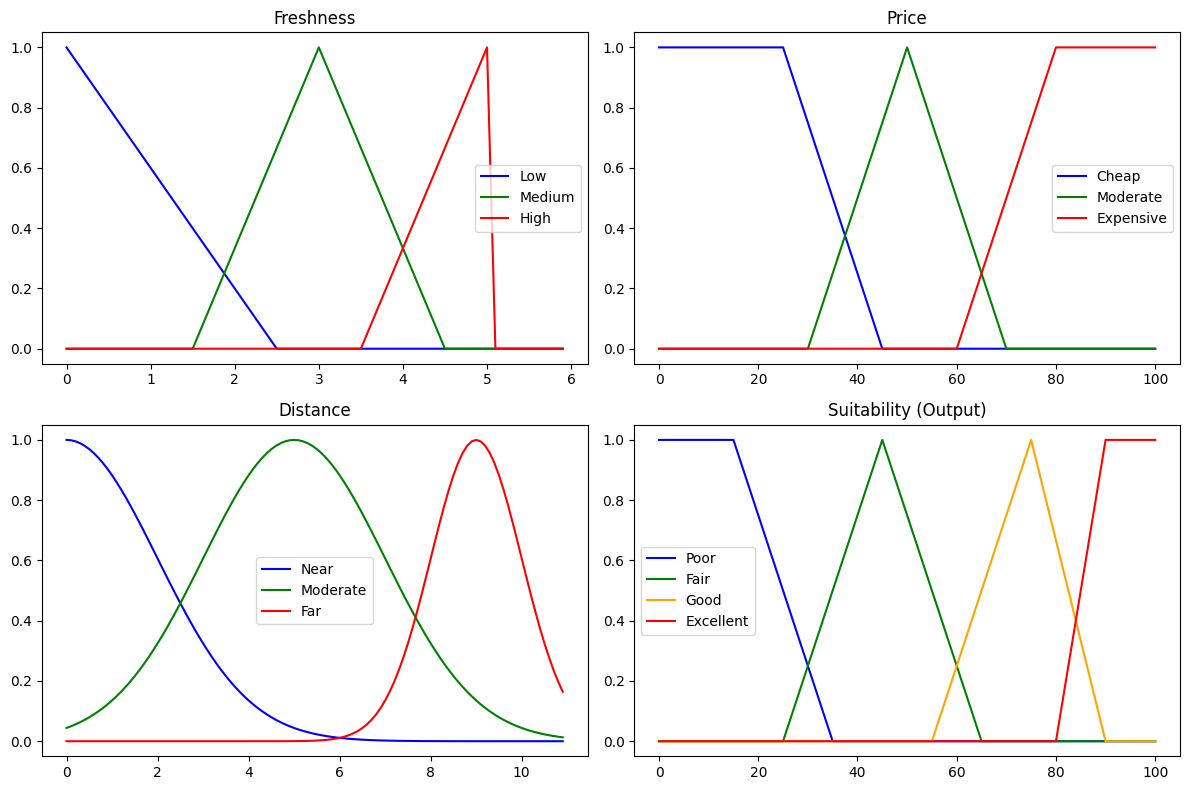

In [ ]:

# Define universes
freshness = np.arange(0, 6, 0.1)     # 0–5 scale
price = np.arange(0, 101, 1)         # 0–100 scale
distance = np.arange(0, 11, 0.1)     # 0–10 km
suitability = np.arange(0, 101, 1)   # 0–100 score

# Define membership functions
fresh_low = fuzz.trimf(freshness, [0, 0, 2.5])
fresh_med = fuzz.trimf(freshness, [1.5, 3, 4.5])
fresh_high = fuzz.trimf(freshness, [3.5, 5, 5])

price_cheap = fuzz.trapmf(price, [0, 0, 25, 45])
price_moderate = fuzz.trimf(price, [30, 50, 70])
price_expensive = fuzz.trapmf(price, [60, 80, 100, 100])

dist_near = fuzz.gaussmf(distance, 0, 2)
dist_medium = fuzz.gaussmf(distance, 5, 2)
dist_far = fuzz.gaussmf(distance, 9, 1)

suit_poor = fuzz.trapmf(suitability, [0, 0, 15, 35])
suit_fair = fuzz.trimf(suitability, [25, 45, 65])
suit_good = fuzz.trimf(suitability, [55, 75, 90])
suit_excellent = fuzz.trapmf(suitability, [80, 90, 100, 100])

# Plot inputs and output
fig, axs = plt.subplots(2, 2, figsize=(12,8))

axs[0,0].plot(freshness, fresh_low, 'b', label='Low')
axs[0,0].plot(freshness, fresh_med, 'g', label='Medium')
axs[0,0].plot(freshness, fresh_high, 'r', label='High')
axs[0,0].set_title('Freshness')
axs[0,0].legend()

axs[0,1].plot(price, price_cheap, 'b', label='Cheap')
axs[0,1].plot(price, price_moderate, 'g', label='Moderate')
axs[0,1].plot(price, price_expensive, 'r', label='Expensive')
axs[0,1].set_title('Price')
axs[0,1].legend()

axs[1,0].plot(distance, dist_near, 'b', label='Near')
axs[1,0].plot(distance, dist_medium, 'g', label='Moderate')
axs[1,0].plot(distance, dist_far, 'r', label='Far')
axs[1,0].set_title('Distance')
axs[1,0].legend()

axs[1,1].plot(suitability, suit_poor, 'b', label='Poor')
axs[1,1].plot(suitability, suit_fair, 'g', label='Fair')
axs[1,1].plot(suitability, suit_good, 'orange', label='Good')
axs[1,1].plot(suitability, suit_excellent, 'r', label='Excellent')
axs[1,1].set_title('Suitability (Output)')
axs[1,1].legend()

plt.tight_layout()
plt.show()


In [ ]:
# ---------- 4. Define Rules ----------
rule1=ctrl.Rule(availability['high'] & product_quality['high'],recommendation['high'])
rule2=ctrl.Rule(product_price['high'],recommendation['low'])
rule3=ctrl.Rule(store_distance['far'] & store_freshness['high'],recommendation['medium'])
rule4=ctrl.Rule(availability['low'],recommendation['low'])
rule5=ctrl.Rule(product_price['low'] & product_quality['high'],recommendation['high'])

recom_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
sim=ctrl.ControlSystemSimulation(recom_ctrl)


In [ ]:
# ---------- 5. Computing Recommendation Score ----------
scores=[]
for _, row in df.iterrows():
    try:
        # Create a fresh simulation each time to avoid state bleed
        sim = ctrl.ControlSystemSimulation(recom_ctrl)

        # Clip all input values to fuzzy variable ranges
        sim.input['store_freshness']   = np.clip(row.store_freshness, 0, 10)
        sim.input['store_distance']    = np.clip(row.store_distance, 0, 10)
        sim.input['product_price']     = np.clip(row.product_price, 0, 10)
        sim.input['product_quality']   = np.clip(row.product_quality, 0, 10)
        sim.input['availability_score']= np.clip(row.availability_score, 0, 1)

        sim.compute()
        scores.append(sim.output.get('recommendation', np.nan))  # safer access
    except Exception as e:
        # If something fails (rare), append NaN and continue
        scores.append(np.nan)
        print(f"⚠️ Row caused error: {e}")

df['recommendation_score'] = np.round(scores, 2)



In [ ]:
# ---------- 6. Plotting Distributions ----------
fig=px.histogram(df,x='recommendation_score',nbins=30,
                 title="Distribution of Fuzzy Recommendation Scores")
fig.show()

fig=px.box(df,x='preferred_product',y='recommendation_score',
           title="Recommendation Scores by Preferred Product")
fig.show()


##  Defuzzification Comparison (for Grocery Recommendation)

Here we compare different defuzzification methods—centroid, bisector, mean/min/max of maxima—
to see how each converts a fuzzy *medium recommendation* into a crisp score.


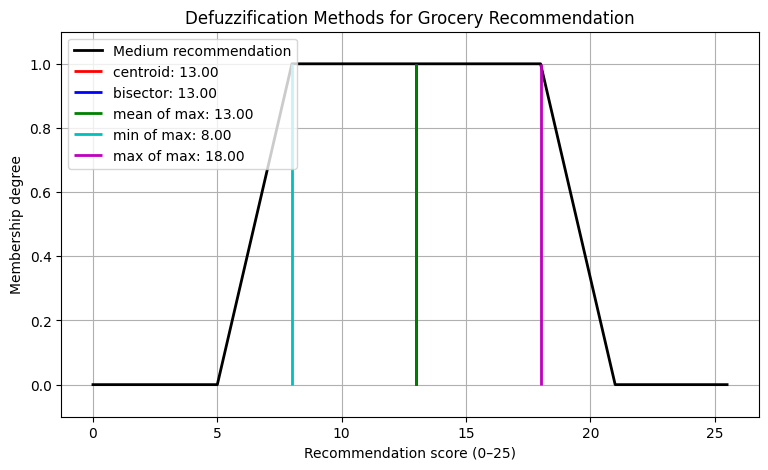

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

# Universe range for grocery recommendation score (0–25)
x = np.arange(0, 26, 0.5)

# Trapezoidal membership for "medium" recommendation
mfx = fuzz.trapmf(x, [5, 8, 18, 21])

# Compute defuzzified values
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Plot setup
labels = ['centroid', 'bisector', 'mean of max', 'min of max', 'max of max']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

plt.figure(figsize=(9, 5))
plt.plot(x, mfx, 'k', linewidth=2, label='Medium recommendation')

for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=f'{label}: {xv:.2f}', color=color, linewidth=2)

plt.title('Defuzzification Methods for Grocery Recommendation')
plt.xlabel('Recommendation score (0–25)')
plt.ylabel('Membership degree')
plt.ylim(-0.1, 1.1)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# ---------- 7. Top 5 Recommendations per User ----------
top5=(df.sort_values(['user','recommendation_score'],ascending=[True,False])
        .groupby('user').head(5))
fig = px.bar(
    top5,
    x='product',
    y='recommendation_score',
    color='store',
    barmode='group',
    facet_col='user',
    title="Top 5 Product Recommendations per User (Grouped by Store)"
)
fig.update_layout(showlegend=True)
fig.show()

# Save CSV for clustering notebook
df.to_csv("dataset_with_recommendations.csv",index=False)
print("dataset_with_recommendations.csv saved")


dataset_with_recommendations.csv saved
